# ICO projects from coinmarketcap - Huynh Duc Toan - coursera

An initial coin offering (ICO) is an event where a company sells a new cryptocurrency to raise money. Investors receive cryptocurrency in exchange for their financial contributions. In many ways, an ICO is the cryptocurrency version of an initial public offering (IPO) in the stock market.

There are milions of ICOs was created, only some project have enough credibility could show them off on coinmarketcap. Let's see how were their perfomances?

Data from [coinmarketcap](https://coinmarketcap.com/ico-calendar/ended/): 

Price data from coinmarketcap api, too

[Getting data process](https://github.com/tycoi2005/202308_machine_learning_ibm_coursera/blob/950d1af7d9682620ee2b8ae84c28a56c0f3c6900/003supervised-machine-learning-classification/w6.project.getcmc.ipynb) and [cleaning process](https://github.com/tycoi2005/202308_machine_learning_ibm_coursera/blob/2255c1017908695c5170adf1d9531a6b915be978/003supervised-machine-learning-classification/w6.project.cleaning.ipynb) could be view at my github


### I'll use dimensional reduction to find important features of a cryptocurrency

In [13]:
## Import packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz, plot_tree
from sklearn.inspection import permutation_importance #, plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('./pj_data/cleaned_data.csv')

## Data overview

Cleaned data look like this:

In [14]:
df.head()

,icoPriceUsd,currentStage,goalUsd,total_supply,price,exchangeName,n_contracts,isbnb,tags_reduce,iseth,issol,ismatic,isada,isavax,lifeday,dayscreated,is_active
0,0.08,1,98000.0,1.000000e+08,0.005751,10,1.0,1,6,0,0,0,0,0,656,656,1
1,0.03,1,80000.0,1.000000e+17,0.000000,10,2.0,0,10,1,1,0,0,0,311,311,0
2,0.60,1,1500000.0,1.000000e+08,0.055907,10,1.0,0,10,0,0,0,0,0,138,138,1
3,0.00,0,300000000.0,1.000000e+17,0.011018,3,1.0,0,10,0,0,0,0,0,4,4,1
4,0.95,1,500000.0,1.000000e+17,0.000000,3,1.0,0,10,1,0,0,0,0,70,70,0



|        FIELD | TYPES   | DESCRIPTION                                                                                                                                                                                                                                                                               |
|-------------:|---------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  icoPriceUsd | float64 | Ico price                                                                                                                                                                                                                                                                                 |
| currentStage | int64   | Current stage 0-6 {'ICO': 0, 'IDO': 1, 'IEO': 2, 'IFO': 3, 'Other': 4, 'Private Sale': 5, 'Seed Sale': 6}                                                                                                                                                                                 |
|      goalUsd | float64 | Goal of ico event in USD                                                                                                                                                                                                                                                                  |
| total_supply | float64 | Token total supply                                                                                                                                                                                                                                                                        |
|        price | float64 | Current price of token                                                                                                                                                                                                                                                                    |
| exchangeName | int64   | Place where project was ico {'BSCpad': 0, 'Binance': 1, 'Coinlist': 2, 'DAO maker': 3, 'DuckStarter': 4, 'Enjinstarter': 5, 'GameFi': 6, 'Gate.io': 7, 'Ignition (Paid Network)': 8, 'Kommunitas': 9, 'Other': 10, 'Polkastarter': 11, 'Poolz': 12, 'Trustpad': 13}                       |
|  n_contracts | float64 | How many blockchain that project was deployed                                                                                                                                                                                                                                             |
|        isbnb | int64   | Is project on binance smart chain?                                                                                                                                                                                                                                                        |
|  tags_reduce | int64   | Project categories {'ai-big-data': 0, 'bnb-chain': 1, 'bullperks-launchpad': 2, 'collectibles-nfts': 3, 'dao-maker': 4, 'defi': 5, 'gaming': 6, 'genpad': 7, 'metaverse': 8, 'okex-blockdream-ventures-portfolio': 9, 'other': 10, 'polygon-ecosystem': 11, 'vbc-ventures-portfolio': 12} |
|        iseth | int64   | Is project on ethereum?                                                                                                                                                                                                                                                                   |
|        issol | int64   | Is project on solana?                                                                                                                                                                                                                                                                     |
|      ismatic | int64   | Is project on polygon?                                                                                                                                                                                                                                                                    |
|        isada | int64   | Is project on cardano?                                                                                                                                                                                                                                                                    |
|       isavax | int64   | Is project on avalanche?                                                                                                                                                                                                                                                                  |
| lifeday      | int64   | How many days token was lived (from created to last_updated)                                                                                                                                                                                                                              |
| dayscreated  | int64   | How many days token was created (from created to the day data was collected)          

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
icoPriceUsd,1220.0,5.891680e+00,1.861119e+02,0.0,1.000000e-02,4.000000e-02,1.500000e-01,6.500000e+03
currentStage,1220.0,1.348361e+00,1.145289e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00
goalUsd,1220.0,5.311083e+07,1.133864e+08,0.0,1.000000e+05,2.000000e+05,2.055000e+06,3.000000e+08
total_supply,1220.0,2.233385e+16,4.163714e+16,100000.0,1.200000e+08,1.000000e+09,6.428501e+10,1.000000e+17
price,1220.0,7.188388e+00,1.961358e+02,0.0,1.267517e-04,1.839954e-03,1.582388e-02,6.615486e+03
exchangeName,1220.0,8.909016e+00,2.816933e+00,0.0,1.000000e+01,1.000000e+01,1.000000e+01,1.300000e+01
n_contracts,1220.0,1.524590e+00,1.010309e+00,1.0,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01
isbnb,1220.0,6.319672e-01,4.824681e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
tags_reduce,1220.0,7.939344e+00,2.963479e+00,0.0,6.000000e+00,1.000000e+01,1.000000e+01,1.200000e+01
iseth,1220.0,3.688525e-01,4.826917e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


Remove blockchain info ()

In [16]:
# Remove blockchain infos
df = df.drop(['iseth', 'isbnb', 'ismatic','isavax','isada','issol'], axis=1)

## is_active : 40% ico coin on cmc was died, with average lifedays 600

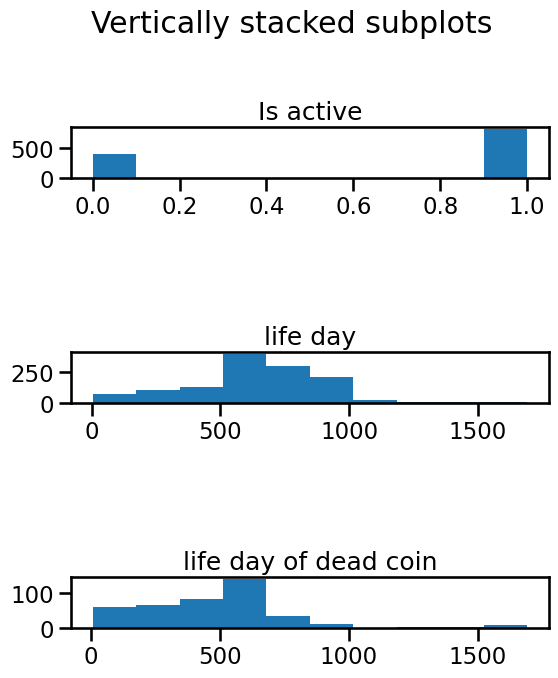

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(8, 8))
fig.tight_layout(pad=5.0)
fig.suptitle('Vertically stacked subplots')
ax1.hist(df.is_active, label="is_active")
ax2.hist(df.lifeday)

df_inactive = df[df['is_active']==0]
ax3.hist(df_inactive.lifeday)

ax1.title.set_text('Is active')
ax2.title.set_text('life day')
ax3.title.set_text('life day of dead coin')

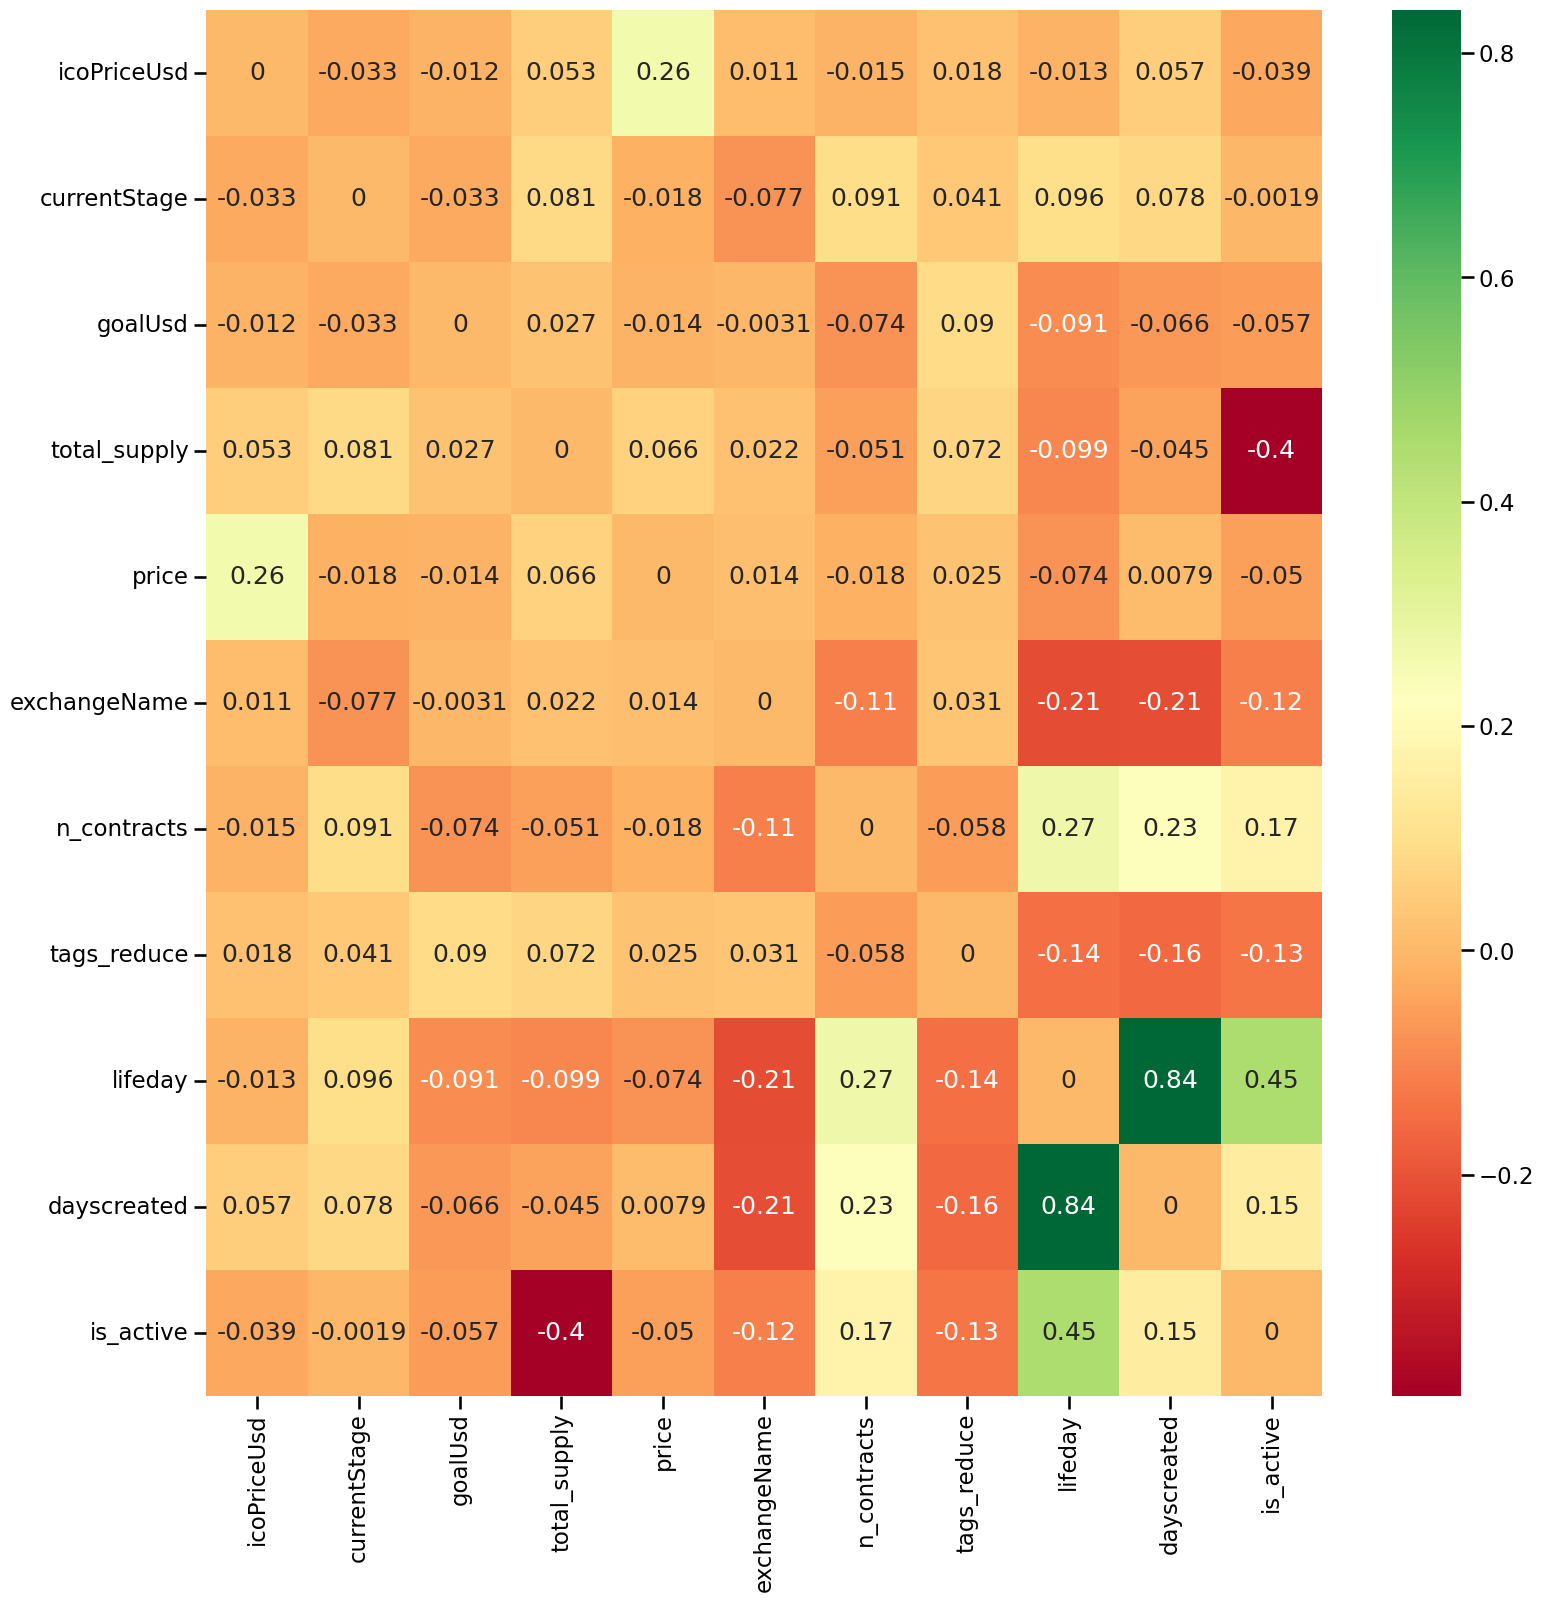

In [18]:
import seaborn as sns
plt.figure(figsize=(18,18))
corr_mat = df.corr()
# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0

sns.heatmap(corr_mat,annot=True,cmap='RdYlGn')

plt.show()

Let's check top correlated variable:

In [19]:
corr_df = corr_mat.abs().agg(['idxmax','max'],axis=1)

corr_df.sort_values(by='max', ascending=False)

,idxmax,max
lifeday,dayscreated,0.838474
dayscreated,lifeday,0.838474
is_active,lifeday,0.449796
total_supply,is_active,0.396721
n_contracts,lifeday,0.269316
icoPriceUsd,price,0.260075
price,icoPriceUsd,0.260075
exchangeName,lifeday,0.214568
tags_reduce,dayscreated,0.15566
currentStage,lifeday,0.096323


We could see some interesting information here:
- total supply is high colerated with cryptocurency status (active or not)
- ico price is colerated with current price
- 

Examine the skew values:

In [20]:
log_columns = df.skew().sort_values(ascending=False)

log_columns

icoPriceUsd     34.909648
price           32.033445
n_contracts      3.150281
currentStage     2.112613
goalUsd          1.717261
total_supply     1.330623
dayscreated      0.251838
lifeday          0.002105
is_active       -0.718449
tags_reduce     -1.016421
exchangeName    -1.776915
dtype: float64

Scale data use Standard Scaler:

In [21]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

for col in df.columns:
    df[col] = ss.fit_transform(df[[col]]).squeeze()

## Perfome PCA to data set to find important features

In [23]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 10):

    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(df)

    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))

    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n,
                                             'features': df.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.216659
2,PCA(n_components=2),0.340451
3,PCA(n_components=3),0.451067
4,PCA(n_components=4),0.545568
5,PCA(n_components=5),0.635832
6,PCA(n_components=6),0.71656
7,PCA(n_components=7),0.794242
8,PCA(n_components=8),0.870911
9,PCA(n_components=9),0.937681


Create a table of feature importantces for each data column


In [24]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,currentStage,dayscreated,exchangeName,goalUsd,icoPriceUsd,is_active,lifeday,n_contracts,price,tags_reduce,total_supply
n,,,,,,,,,,,
1,0.033101,0.192038,0.088462,0.041424,0.008925,0.142749,0.216794,0.109622,0.024414,0.070419,0.072054
2,0.055630,0.148373,0.066758,0.025907,0.088364,0.136898,0.130649,0.067841,0.093709,0.054209,0.131662
3,0.089013,0.106696,0.065677,0.030557,0.121114,0.123904,0.093481,0.057092,0.122686,0.057316,0.132466
4,0.071826,0.084892,0.080774,0.095241,0.105659,0.113050,0.077895,0.050088,0.104539,0.093726,0.122311
5,0.099171,0.088243,0.066699,0.102391,0.087902,0.105592,0.073825,0.063942,0.095863,0.102005,0.114366
6,0.090144,0.089746,0.110280,0.090894,0.077558,0.091524,0.078380,0.064598,0.090162,0.116516,0.100198
7,0.110549,0.080040,0.115596,0.104794,0.070261,0.084803,0.069548,0.059173,0.084600,0.130630,0.090007
8,0.112432,0.079168,0.103114,0.105380,0.065079,0.079151,0.070434,0.095667,0.078193,0.125353,0.086029
9,0.105796,0.075766,0.097109,0.096664,0.091742,0.073887,0.067494,0.090990,0.102886,0.117165,0.080499


Create a plot of explained vaariances

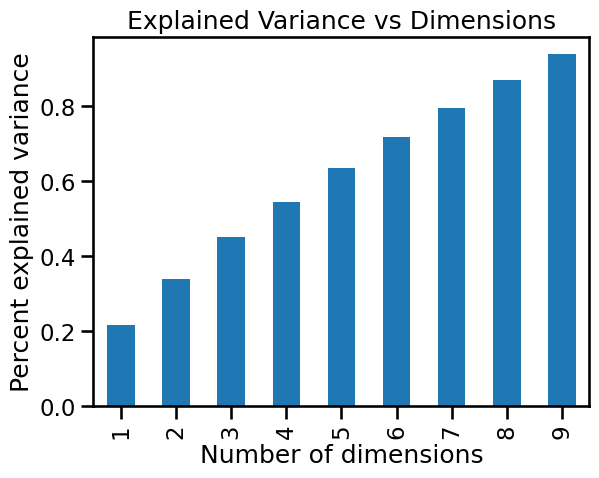

In [25]:
sns.set_context('talk')
ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

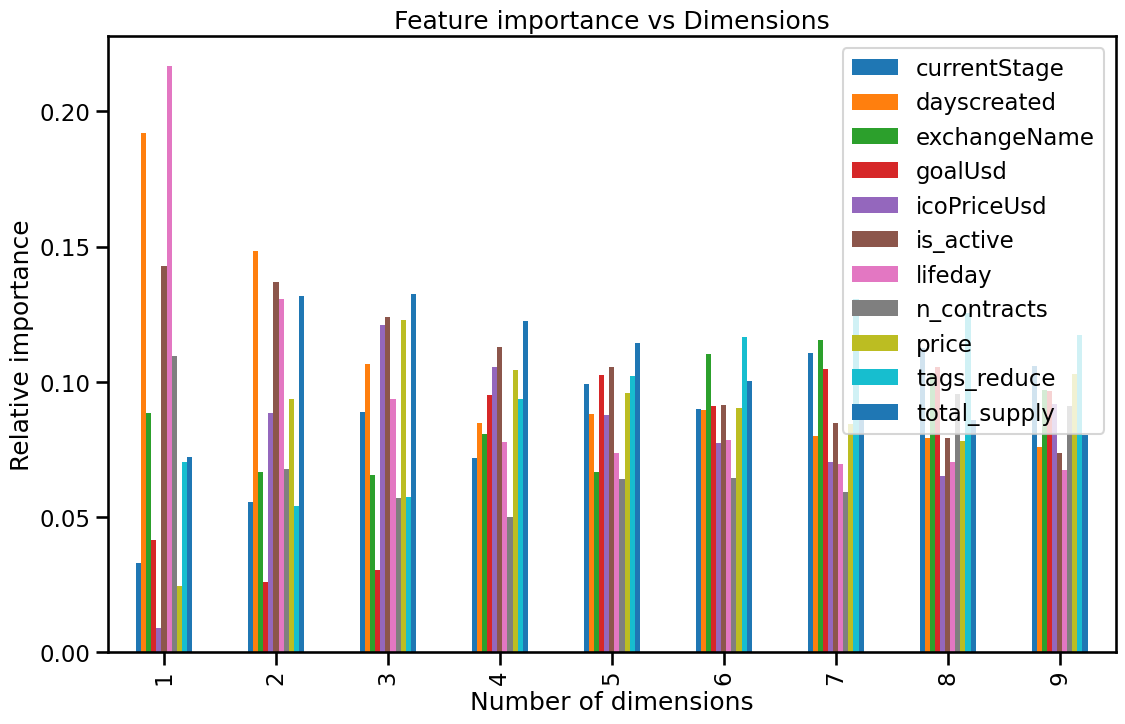

In [26]:
ax = features_df.plot(kind='bar', figsize=(13,8))
ax.legend(loc='upper right')
ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

### Let use Kernel PCA and compare with PCA, try 'rbf','linear', 'cosine'

In [49]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Custom scorer--use negative rmse of inverse transform
def scorer(pcamodel, X, y=None):

    try:
        X_val = X.values
    except:
        X_val = X

    # Calculate and inverse transform the data
    data_inv = pcamodel.fit(X_val).transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)

    # The error calculation
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())
    #print("mse of ", pcamodel.n_components, " : ", mse)
    # Larger values are better for scorers, so take negative value
    return -1.0 * mse

# The grid search parameters
param_grid = {'gamma':[0.001, 0.01, 0.05, 0.1, 0.5, 1.0],
              'n_components': [2, 3, 4, 5, 6, 7, 8, 9]
              ,'kernel':['rbf', 'cosine', 'linear']
              }

# The grid search
kernelPCA = GridSearchCV(KernelPCA( fit_inverse_transform=True),
                         param_grid=param_grid,
                         scoring=scorer,
                         n_jobs=-1)

X = df.drop(columns='is_active')
Y = df['is_active']

kernelPCA = kernelPCA.fit(X)

kernelPCA.best_estimator_

KernelPCA(fit_inverse_transform=True, gamma=0.01, n_components=9)

Let see what best KernelPCA tell us about data:

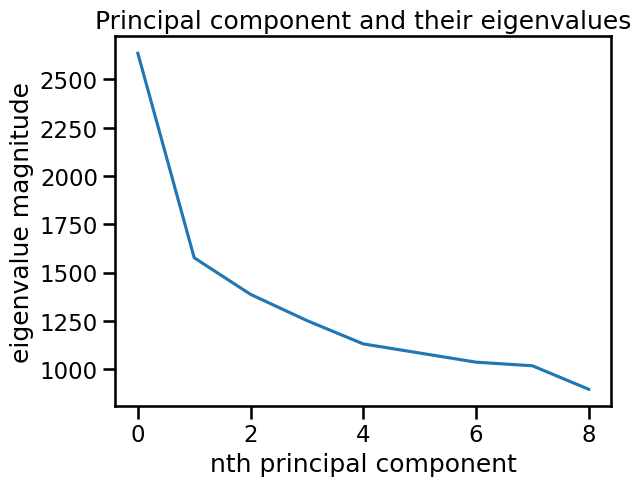

In [42]:
k_df = kernelPCA.transform(X)

#vark = kernelPCA.best_estimator_
plt.plot(kernelPCA.best_estimator_.eigenvalues_)

plt.title("Principal component and their eigenvalues")
plt.xlabel("nth principal component")
plt.ylabel("eigenvalue magnitude")
plt.show()

The first principal components have the largest absolute eigenvalue.

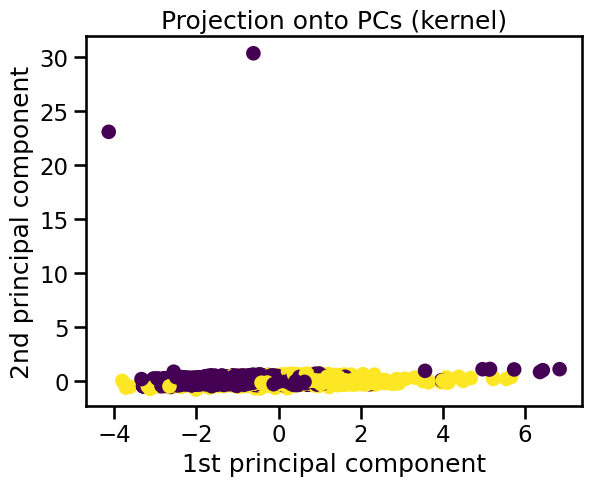

In [47]:
plt.scatter(k_df[:,0],k_df[:,1] , c=Y, cmap='viridis')
plt.title("Projection onto PCs (kernel)")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

Best KernelPCA is linear. It means our data is linear corelated and best fit with LinearRegression Model

# Summary Key Findings and Insights:

The data is linear colerated, good for Linear Regression
- total supply is high colerated with cryptocurency status (active or not)
- ico price is colerated with current price


# Future plan

The data still need to improved someway:
- Exchange should be ranked
- Blockchain type: add first blockchain issue and categorical it by blockchain popular
- Some ico price is missing (0 value), should have ico price and the ROI

There are many other infos from a project could explain the cryptocurrency. For examples team size, white paper, public sale percentage, personal cap... There infos should be collected and put in dataframe too.